In [1]:
%matplotlib inline
import pickle as pkl
import numpy as np
import spectral
import pandas as pd
import scipy.io as io
import os

Load the ground truth image
===========================

In [2]:
DATA_PATH = os.path.join(os.getcwd(),"Data")
output_image = io.loadmat(os.path.join(DATA_PATH, 'Indian_pines_gt.mat'))['indian_pines_gt']

Analyze the target image
=======================

In [3]:
height = output_image.shape[0]
width = output_image.shape[1]
targets = []
for j in range(height):
    for i in range(width):
        if output_image[j][i]==0 :
            continue
        else :
            targets.append(output_image[j][i])

In [4]:
unq, unq_idx = np.unique(targets, return_inverse=True)
unq_cnt = np.bincount(unq_idx)
count_mat = []
for i in range(len(unq_cnt)):
    count_mat.append(unq_cnt[i])
print ("Polulation of target pixels of different classes: ",count_mat)

Polulation of target pixels of different classes:  [46, 1428, 830, 237, 483, 730, 28, 478, 20, 972, 2455, 593, 205, 1265, 386, 93]


In [5]:
validation_scores = {'5x5': 86.19, '11x11':85.19, '21x21':97.31, '31x31':98.19, '37x37':99.56}
CLASSES = 16

In [6]:
total = sum(validation_scores.values())
credibility = {}
for keys,value in validation_scores.items():
    credibility[keys]=value/total 

In [11]:
output_predictions = {}

with open('Predictions.pkl', 'rb') as f:
    for i in range(5):
        try:
            data = pkl.load(f)
            for keys, values in data.items():
                score = validation_scores.get(keys)  # Getting the score from validation_scores dictionary
                if score is not None:
                    for a in range(len(values)):
                        for b in range(len(values[a])):
                            if isinstance(values[a][b], int):
                                values[a][b] = np.zeros((16))  # Replace int values with arrays of zeros       
                    output_predictions[keys] = np.asarray(values) * credibility.get(keys, 1.0)  # Adjust if needed
        except EOFError:
            break  # Exit the loop when end of file is reached


c:\Users\hashi\Downloads\ML_Class\.venv\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [12]:
final_matrix = sum(output_predictions.values())

In [14]:
predictions=[]
cnf_mat =[[0 for x in range(CLASSES)] for  y in range(CLASSES)]
for i in range(len(final_matrix)):
    temp=[]
    for j in range(len(final_matrix[i])):
        if np.count_nonzero(final_matrix[i][j]) == 0 :
            temp.append(0)
        else:
            tmp = np.argmax(final_matrix[i][j])
            temp.append(tmp+1)
            if tmp == output_image[i][j]-1:
                cnf_mat[tmp][tmp] = cnf_mat[tmp][tmp] + 1
            else :
                cnf_mat[tmp][output_image[i][j]-1] = cnf_mat[tmp][output_image[i][j]-1] + 1
    predictions.append(temp)
for i in range(CLASSES):
    for j in range(CLASSES):
        cnf_mat[i][j] = 100*(float(cnf_mat[i][j])/count_mat[j])

df = pd.DataFrame(cnf_mat) 
print(df)
predictions = np.array(predictions)

       0          1          2          3          4          5      6   \
0   100.0   0.140056   0.000000   0.000000   0.000000   0.000000    0.0   
1     0.0  93.277311   0.000000   0.000000   0.000000   0.000000    0.0   
2     0.0   0.280112  65.903614   0.000000   0.000000   0.000000    0.0   
3     0.0   0.840336   0.000000  64.135021   0.000000   0.410959    0.0   
4     0.0   0.420168   0.000000   0.000000  69.565217   0.410959    0.0   
5     0.0   0.000000   0.000000   0.000000   0.414079  98.904110    0.0   
6     0.0   0.000000   0.000000   0.000000   0.000000   0.000000  100.0   
7     0.0   0.000000   0.000000   0.000000   0.000000   0.000000    0.0   
8     0.0   0.000000   0.000000   0.000000   0.000000   0.000000    0.0   
9     0.0   0.490196   0.000000   0.000000   0.000000   0.000000    0.0   
10    0.0   0.840336   0.000000   0.000000   0.000000   0.273973    0.0   
11    0.0   0.140056   0.000000   0.000000   0.000000   0.000000    0.0   
12    0.0   0.070028   0.

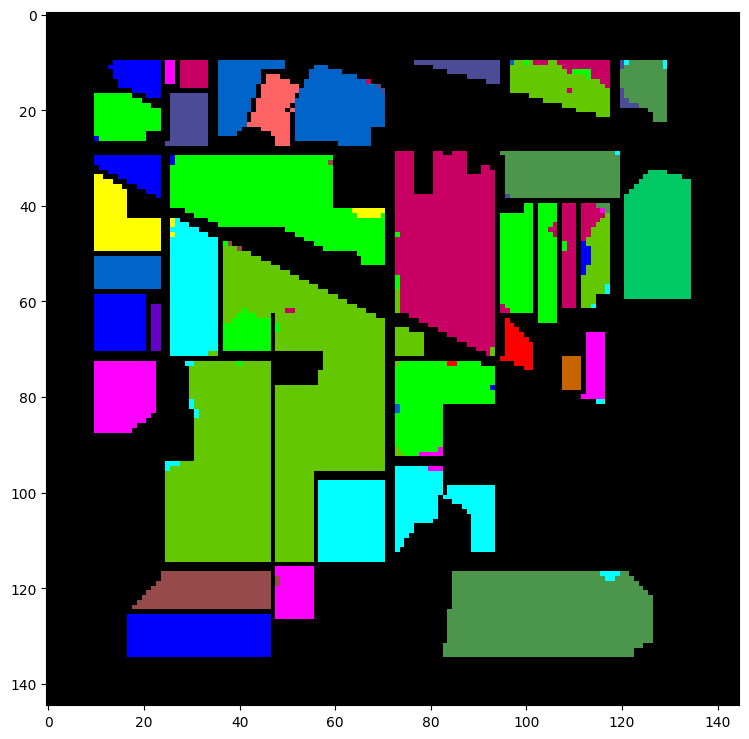

In [15]:
show = spectral.imshow(classes = predictions , figsize=(9,9))